<a href="https://colab.research.google.com/github/AkshayRai20/Projects1/blob/main/Akshay_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [2]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Cohort Aravali/CohortAravali-201005-153433.zip (Unzipped Files)/AlmaBetter/Module 4/Week 4/Day 1/Online Retail.xlsx')


In [5]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


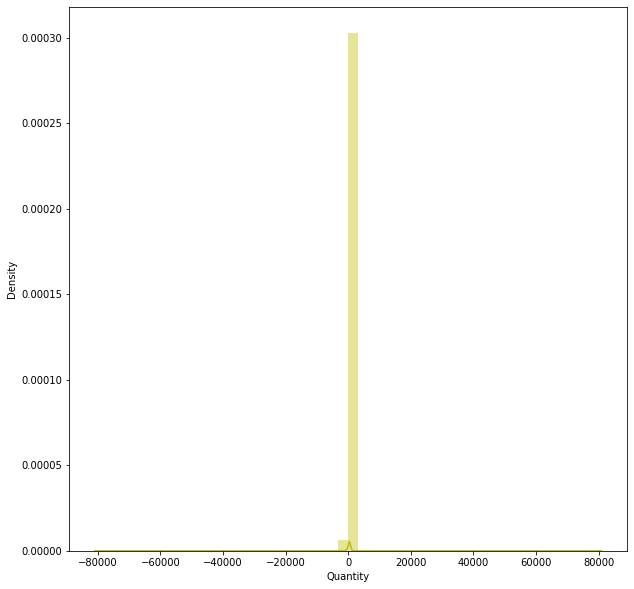

In [8]:
plt.figure(figsize=(10,10))
sns.distplot(df['Quantity'],color="y")

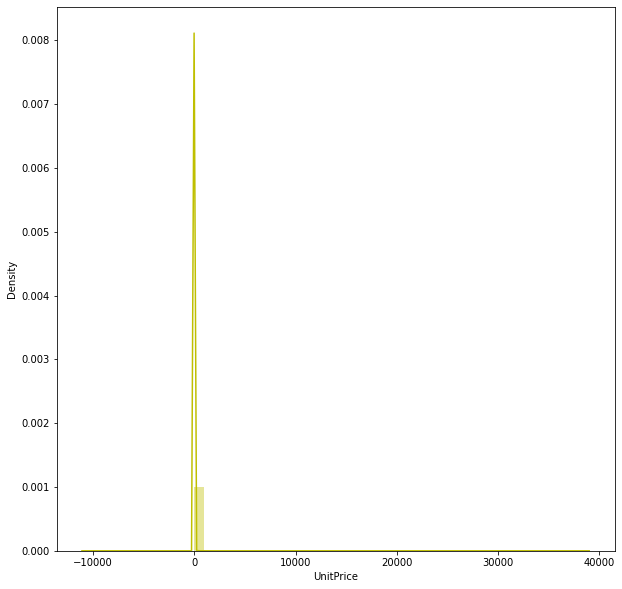

In [9]:
plt.figure(figsize=(10,10))
sns.distplot(df['UnitPrice'],color="y")

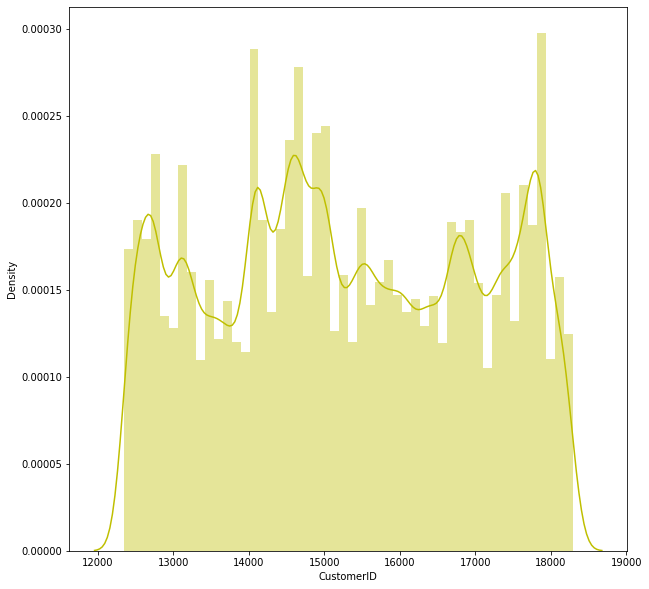

In [10]:
plt.figure(figsize=(10,10))
sns.distplot(df['CustomerID'],color="y")

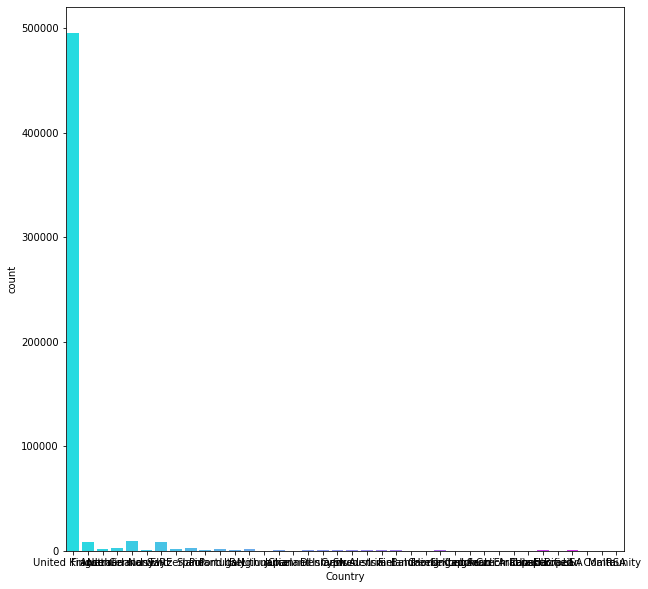

In [11]:
#Countries
plt.figure(figsize=(10,10))
sns.countplot(x='Country', data = df, palette='cool')


In [12]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

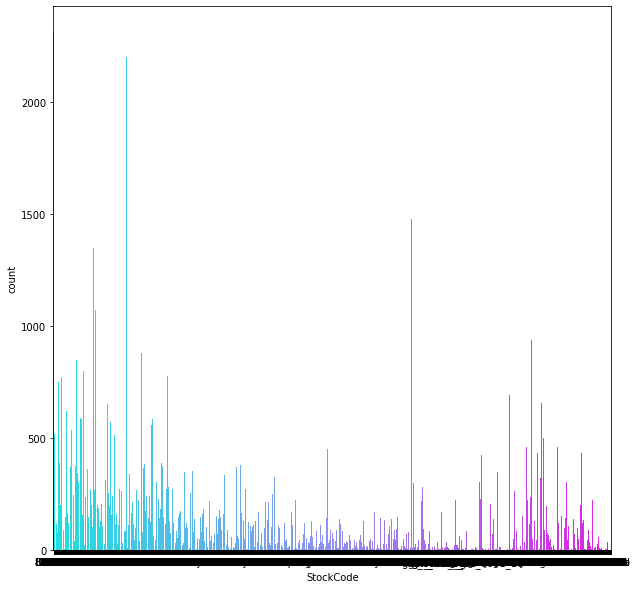

In [13]:
#StockCode
plt.figure(figsize=(10,10))
sns.countplot(x='StockCode', data = df, palette='cool')

In [14]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [15]:
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

In [16]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


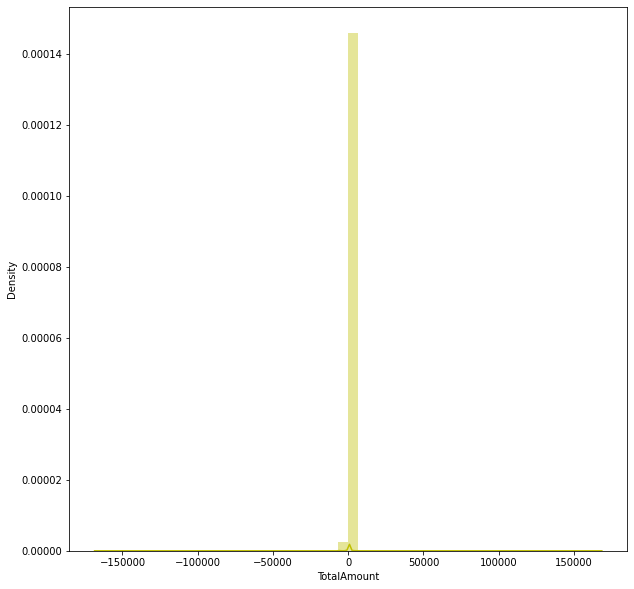

In [17]:
plt.figure(figsize=(10,10))
sns.distplot(df['TotalAmount'],color="y")

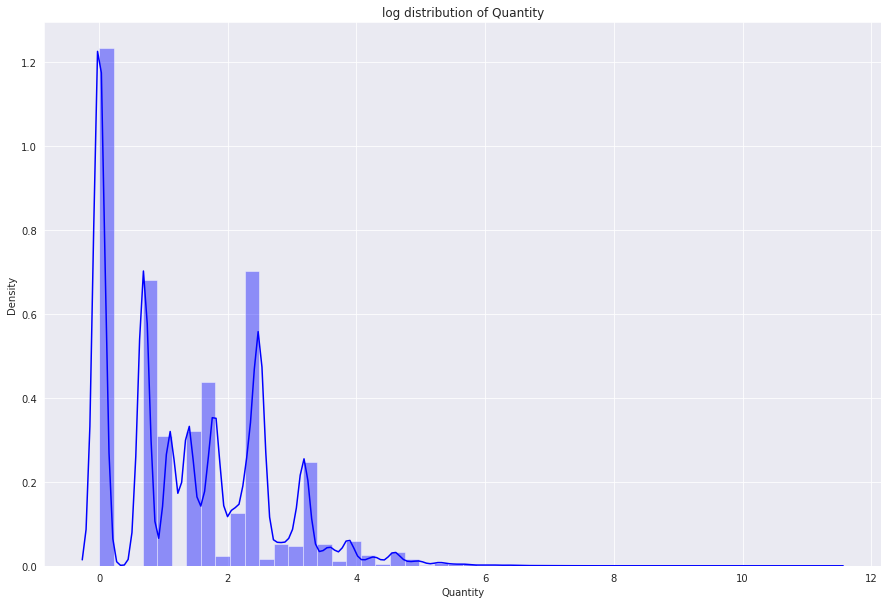

In [39]:

plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

In [18]:
#There are some negative amounts. Exploration is needed. 

In [19]:
#Assuming they are refunds
refunds = df[df['Quantity']<0]['InvoiceNo'].nunique()
refunds

5172

In [1]:

plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

NameError: ignored

In [20]:
orders = df[df['Quantity']>=0]['InvoiceNo'].nunique()
orders

20728

In [21]:
refund_factor=(refunds/orders)*100
refund_factor

24.951756078734082

In [22]:
#Close to 25% of orders are either anomalies or refunds

In [23]:
top10_countries = df['Country'].value_counts()[0:10]

In [24]:
top10_countries_new = top10_countries.reset_index().rename(columns = {'index':'country','country':'TotalAmount'})
top10_countries_new

,country,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


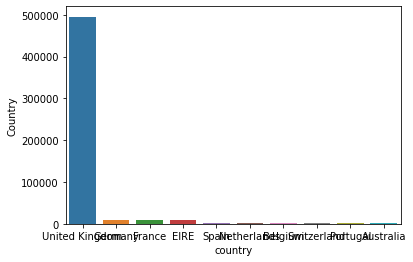

In [25]:
ax = sns.barplot(x="country", y="Country", data=top10_countries_new)

In [26]:
df['monthly sales'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y-%m')
sales_month = df.groupby(['monthly sales'],as_index = False).agg({'TotalAmount':'sum'})

In [27]:
df.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,monthly sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12


In [28]:
sales_month

,monthly sales,TotalAmount
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


In [29]:
cust_country = df.groupby(['CustomerID'],as_index = False).agg({'TotalAmount':'sum','InvoiceNo':'count','Country':'first'})
cust_country

,CustomerID,TotalAmount,InvoiceNo,Country
0,12346.0,0.00,2,United Kingdom
1,12347.0,4310.00,182,Iceland
2,12348.0,1797.24,31,Finland
3,12349.0,1757.55,73,Italy
4,12350.0,334.40,17,Norway
...,...,...,...,...
4367,18280.0,180.60,10,United Kingdom
4368,18281.0,80.82,7,United Kingdom
4369,18282.0,176.60,13,United Kingdom
4370,18283.0,2094.88,756,United Kingdom


In [30]:
sales_by_country = df.groupby(['Country']).TotalAmount.sum().sort_values(ascending = False).reset_index()
TotalSales = sales_by_country['TotalAmount'].sum()
sales_by_country['% of total sales'] = sales_by_country['TotalAmount']/TotalSales
#Top 5 countries by sales
sales_by_country.head()

,Country,TotalAmount,% of total sales
0,United Kingdom,8.187806e+06,0.839969
1,Netherlands,2.846615e+05,0.029203
2,EIRE,2.632768e+05,0.027009
3,Germany,2.216982e+05,0.022744
4,France,1.974039e+05,0.020251


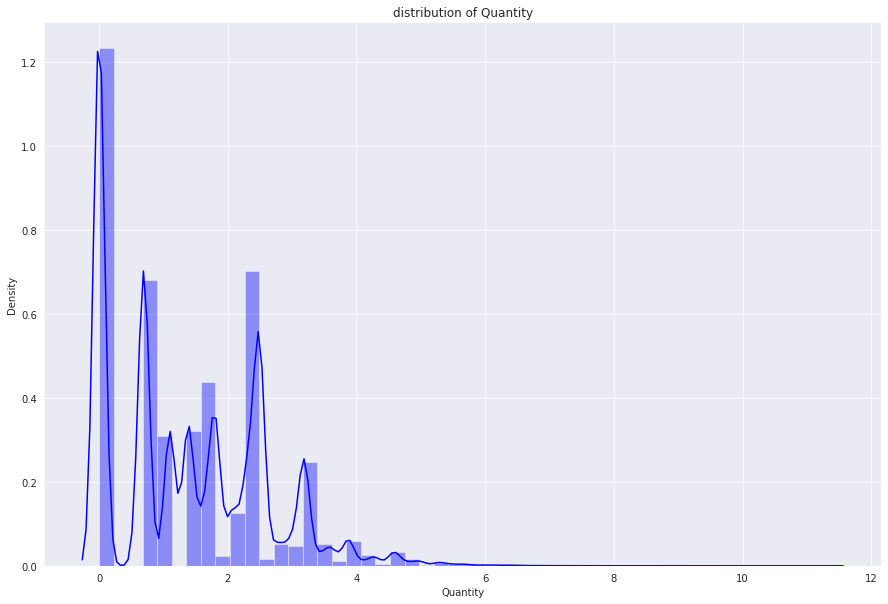

In [40]:
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

Average Order :  480.7621873111767


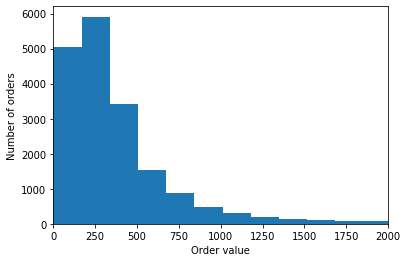

In [31]:

df_wt_cust = df[(df['CustomerID'].notnull()) & (df['Quantity']>0)]
order_net = df_wt_cust.groupby(['InvoiceNo']).TotalAmount.sum()
AverageOrder = order_net.mean()
plt.hist(order_net,bins=1000)
plt.xlim(0,2000)
plt.xlabel("Order value")
plt.ylabel("Number of orders")
print("Average Order : ",AverageOrder)

In [42]:
df['Month']=df['InvoiceDate'].dt.month_name()
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,monthly sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,December


In [44]:
df['Day']=df['InvoiceDate'].dt.day_name()
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,103857
1,Tuesday,101808
2,Monday,95111
3,Wednesday,94565
4,Friday,82193
5,Sunday,64375


In [45]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,84711
1,December,68006
2,October,60742
3,September,50226
4,July,39518
5,May,37030
6,June,36874
7,March,36748
8,August,35284
9,January,35147


In [ ]:
#Highest number of items sold in November/December - Possibly in anticipation of Christmas

In [46]:
#RFM (Recency, Frequency,Monetary value) model 
#Recency = Latest Date - Last Inovice Data, Frequency = count(s) of transaction of invoice(s), Monetary = Sum of Total 
import datetime as dt
Latest_Date = dt.datetime(2011,12,10)
rfmdf = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

rfmdf['InvoiceDate'] = rfmdf['InvoiceDate'].astype(int)


rfmdf.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

In [48]:
rfmdf.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [32]:
#Testing 

In [33]:
encoder = LabelEncoder()
cust_country['Country'] = encoder.fit_transform(cust_country['Country'])

In [34]:
X = cust_country[['TotalAmount','InvoiceNo','Country']]
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Number of clusters vs inertia values')

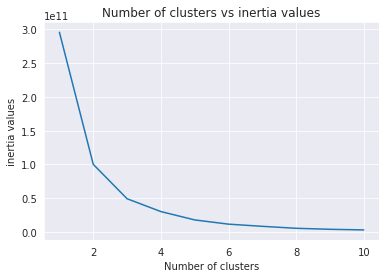

In [35]:
sns.set_style('darkgrid')
sns.lineplot(range(1,11),inertias)
plt.xlabel('Number of clusters')
plt.ylabel('inertia values')
plt.title('Number of clusters vs inertia values')

In [36]:
#Optimum no of clusters is 2

In [37]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

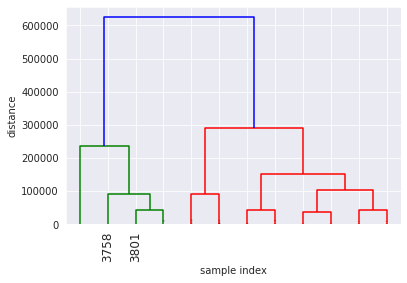

In [38]:
Z = linkage(X, method='ward',metric='euclidean')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,truncate_mode='lastp',p=12,show_leaf_counts=False,  
            leaf_rotation=90.,leaf_font_size=12.,show_contracted=True,)
plt.show()

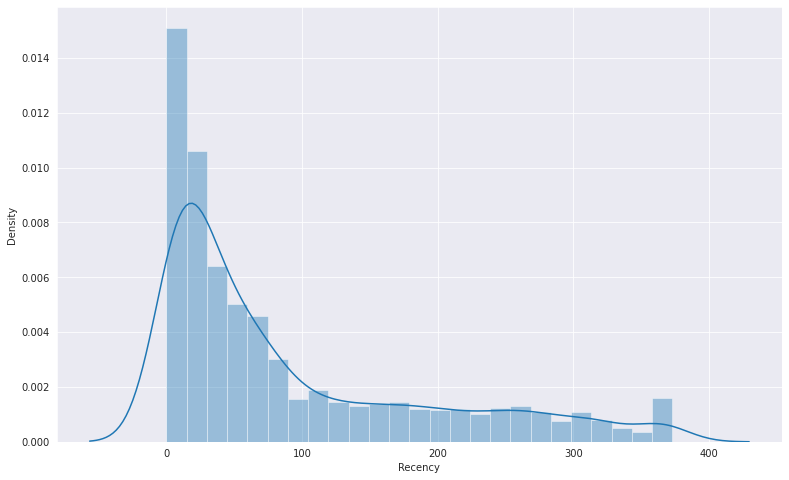

In [53]:
a = rfmdf['Recency']
plt.figure(figsize=(13,8))
sns.distplot(a)

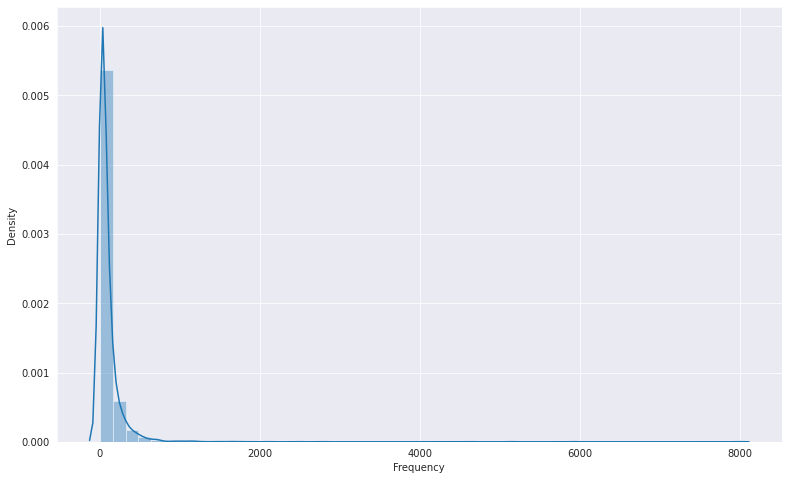

In [55]:
import seaborn as sns
b = rfmdf['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(b)

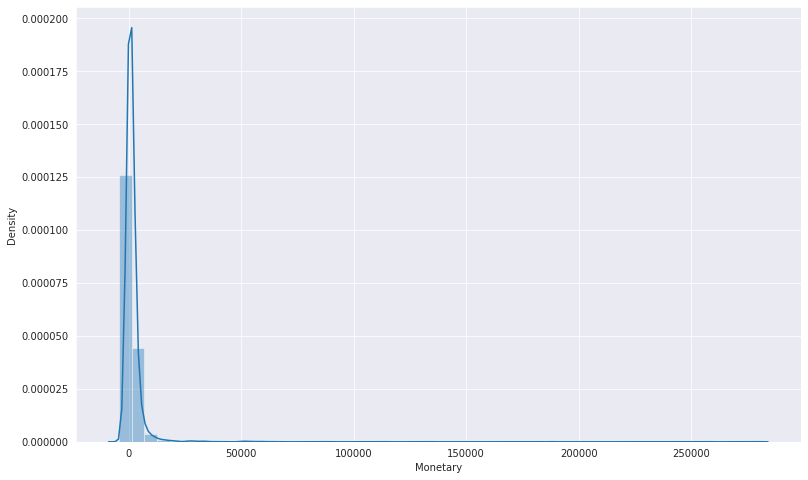

In [56]:
c = rfmdf['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(c)

Flow:
1. EDA
2. Feature engineering
3. Different types of clustering
4. Conclusion

*Day 1:*
a. EDA

*Day 2:*
a. EDA

*Day 3:*
a. Test run of clustering

